In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz" # tar ball
data_dir = tf.keras.utils.get_file("flower_photos.tar", origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix("")

In [3]:
data_dir

WindowsPath('C:/Users/HP/.keras/datasets/flower_photos')

In [4]:
import glob
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [5]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/dandelion'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/LICENSE.txt'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/roses'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/sunflowers'),
 WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/tulips')]

In [6]:
list(data_dir.glob('daisy'))

[WindowsPath('C:/Users/HP/.keras/datasets/flower_photos/daisy')]

In [7]:
len(list(data_dir.glob('*/*')))

3670

In [8]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [9]:
import os

In [10]:
os.listdir("C:/Users/HP/.keras/datasets/flower_photos")

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']

In [11]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [20]:
train_dataset = image_dataset_from_directory(
    data_dir, 
    validation_split=0.2, 
    subset="training", seed=123, 
    image_size=(150, 150), 
    batch_size=32,
    label_mode='categorical'
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [21]:
validation_dataset = image_dataset_from_directory( 
    data_dir, 
    validation_split=0.2,
    subset="validation", 
    seed=123, 
    image_size=(150, 150),
    batch_size=32,
    label_mode='categorical'
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [23]:
# to check wether data is onehotencoded or not
for images, labels in train_dataset.take(1): 
    ("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape) 
    print("Labels:", labels)

Label batch shape: (32, 5)
Labels: tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]], shape=(32, 5), dtype=float32)


In [24]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) 
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2), tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(len(class_names), activation='softmax') ])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [27]:
model.compile( optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'] )

In [28]:
history = model.fit(
    train_dataset, 
    epochs=10, 
    validation_data=validation_dataset, 
    verbose=1 )

Epoch 1/10
92/92 [==============================] - 44s 445ms/step - loss: 86.0700 - accuracy: 0.2888 - val_loss: 1.6813 - val_accuracy: 0.3420
Epoch 2/10
92/92 [==============================] - 41s 449ms/step - loss: 1.3276 - accuracy: 0.4819 - val_loss: 1.5229 - val_accuracy: 0.3542
Epoch 3/10
92/92 [==============================] - 40s 440ms/step - loss: 1.0448 - accuracy: 0.6192 - val_loss: 1.5546 - val_accuracy: 0.4114
Epoch 4/10
92/92 [==============================] - 40s 434ms/step - loss: 0.6943 - accuracy: 0.7640 - val_loss: 2.1073 - val_accuracy: 0.3542
Epoch 5/10
92/92 [==============================] - 38s 416ms/step - loss: 0.4885 - accuracy: 0.8478 - val_loss: 2.8769 - val_accuracy: 0.4292
Epoch 6/10
92/92 [==============================] - 38s 418ms/step - loss: 0.3309 - accuracy: 0.9125 - val_loss: 3.4524 - val_accuracy: 0.4114
Epoch 7/10
92/92 [==============================] - 38s 413ms/step - loss: 0.3054 - accuracy: 0.9210 - val_loss: 3.5465 - val_accuracy: 0.389

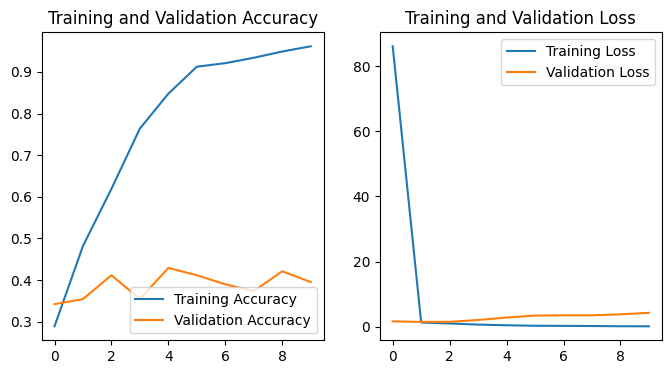

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()